In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [2]:
start = '2011-01-01'
end = '2021-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head

<bound method NDFrame.head of                   High         Low        Open       Close       Volume  \
Date                                                                      
2010-12-31   11.552857   11.475357   11.533929   11.520000  193508000.0   
2011-01-03   11.795000   11.601429   11.630000   11.770357  445138400.0   
2011-01-04   11.875000   11.719643   11.872857   11.831786  309080800.0   
2011-01-05   11.940714   11.767857   11.769643   11.928571  255519600.0   
2011-01-06   11.973214   11.889286   11.954286   11.918929  300428800.0   
...                ...         ...         ...         ...          ...   
2021-12-27  180.419998  177.070007  177.089996  180.330002   74919600.0   
2021-12-28  181.330002  178.529999  180.160004  179.289993   79144300.0   
2021-12-29  180.630005  178.139999  179.330002  179.380005   62348900.0   
2021-12-30  180.570007  178.089996  179.470001  178.199997   59773000.0   
2021-12-31  179.229996  177.259995  178.089996  177.570007   64062300.

In [3]:
df.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.344055


In [4]:
df = df.reset_index()
df.head()


,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.864277
1,2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.078653
2,2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.131251
3,2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.214128
4,2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.205872


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,11.973214,11.889286,11.954286,11.918929,300428800.0


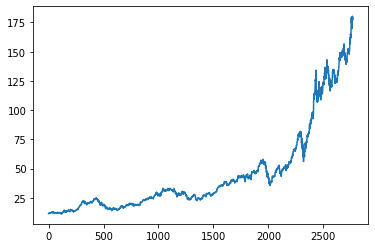

In [6]:
plt.plot(df.Close)

In [7]:
#moving avrgs 
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2765    153.3444
2766    153.6667
2767    153.9991
2768    154.3202
2769    154.6399
Name: Close, Length: 2770, dtype: float64

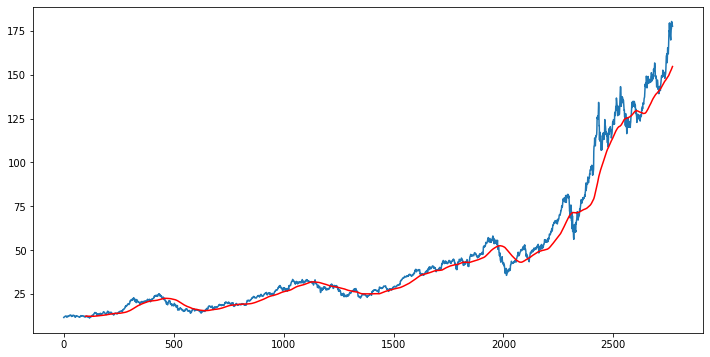

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2765    142.85570
2766    143.13220
2767    143.40125
2768    143.66845
2769    143.95365
Name: Close, Length: 2770, dtype: float64

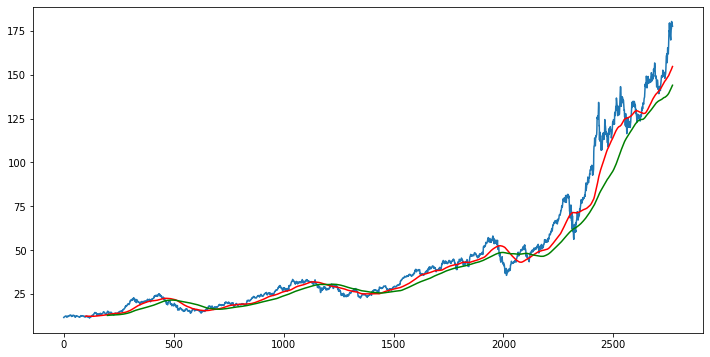

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [11]:
df.shape

(2770, 5)

In [12]:
#splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1938, 1)
(832, 1)


In [13]:
data_training.head()

,Close
0,11.520000
1,11.770357
2,11.831786
3,11.928571
4,11.918929


In [14]:
data_testing.head()

,Close
1938,56.602501
1939,55.959999
1940,54.470001
1941,54.560001
1942,54.592499


In [15]:
#scaling data bw 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00564215],
       [0.01110504],
       [0.01244545],
       ...,
       [0.94528523],
       [0.97539747],
       [0.96023227]])

In [17]:
#x_train y_train division

x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train

[array([[0.00564215],
        [0.01110504],
        [0.01244545],
        [0.01455734],
        [0.01434695],
        [0.01620947],
        [0.02114245],
        [0.02051123],
        [0.02267766],
        [0.02365958],
        [0.02584163],
        [0.0197397 ],
        [0.01832918],
        [0.01352868],
        [0.00888404],
        [0.01724596],
        [0.02032418],
        [0.02223348],
        [0.02173471],
        [0.01619387],
        [0.01870323],
        [0.02315305],
        [0.02259975],
        [0.02191395],
        [0.02429862],
        [0.02849128],
        [0.03107854],
        [0.03338528],
        [0.03056421],
        [0.0323644 ],
        [0.03418017],
        [0.03474126],
        [0.03725843],
        [0.03349439],
        [0.0274626 ],
        [0.01814993],
        [0.02127495],
        [0.02147755],
        [0.02559227],
        [0.02952774],
        [0.02648846],
        [0.02867829],
        [0.03447631],
        [0.03481921],
        [0.03120325],
        [0

In [18]:
#conver x, y train in arrays for lstm model
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
#ML model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [22]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
58/58 [==============================] - 27s 470ms/step - loss: 0.0281
Epoch 2/50
58/58 [==============================] - 36s 613ms/step - loss: 0.0061
Epoch 3/50
58/58 [==============================] - 34s 589ms/step - loss: 0.0054
Epoch 4/50
58/58 [==============================] - 36s 623ms/step - loss: 0.0048
Epoch 5/50
58/58 [==============================] - 36s 627ms/step - loss: 0.0049
Epoch 6/50
58/58 [==============================] - 47s 818ms/step - loss: 0.0046
Epoch 7/50
58/58 [==============================] - 37s 632ms/step - loss: 0.0040
Epoch 8/50
58/58 [==============================] - 36s 621ms/step - loss: 0.0049
Epoch 9/50
58/58 [==============================] - 36s 620ms/step - loss: 0.0036
Epoch 10/50
58/58 [==============================] - 37s 642ms/step - loss: 0.0036
Epoch 11/50
58/58 [==============================] - 38s 648ms/step - loss: 0.0037
Epoch 12/50
58/58 [==============================] - 36s 616ms/step - loss: 0.0034
Epoch 13/50
5

In [23]:
model.save('keras_model.h5')

In [24]:
data_testing.head()

,Close
1938,56.602501
1939,55.959999
1940,54.470001
1941,54.560001
1942,54.592499


In [25]:
past_100_days = data_training.tail(100)

In [26]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [27]:
final_df.head()

,Close
0,41.310001
1,40.735001
2,40.912498
3,41.055000
4,40.580002


In [28]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.03980109],
       [0.03582961],
       [0.03705557],
       [0.03803982],
       [0.03475904],
       [0.0398356 ],
       [0.04646626],
       [0.05936492],
       [0.05991746],
       [0.07190095],
       [0.0741975 ],
       [0.07573429],
       [0.0779963 ],
       [0.08262392],
       [0.08012017],
       [0.0793604 ],
       [0.07640771],
       [0.0794122 ],
       [0.07735742],
       [0.07618323],
       [0.07846252],
       [0.07765096],
       [0.07972303],
       [0.0793604 ],
       [0.08010291],
       [0.07892872],
       [0.07823804],
       [0.07715019],
       [0.08296929],
       [0.08571478],
       [0.08827033],
       [0.08942723],
       [0.08852935],
       [0.08549029],
       [0.08467873],
       [0.0864918 ],
       [0.08376357],
       [0.08393625],
       [0.08055185],
       [0.08037919],
       [0.07511267],
       [0.07651131],
       [0.07471553],
       [0.07378308],
       [0.06903458],
       [0.07293697],
       [0.07247078],
       [0.074

In [29]:
input_data.shape

(932, 1)

In [30]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [31]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(832, 100, 1)
(832,)


In [32]:
#making predictions

y_predicted = model.predict(x_test)

In [33]:
y_predicted.shape

(832, 1)

In [34]:
y_test

array([0.14542503, 0.14098733, 0.13069605, 0.13131767, 0.13154213,
       0.1344085 , 0.13031616, 0.13572081, 0.13813824, 0.13508192,
       0.142904  , 0.14426813, 0.14689274, 0.15038074, 0.15519832,
       0.14815327, 0.14176435, 0.14086647, 0.14621932, 0.12807141,
       0.12477336, 0.1380001 , 0.12979814, 0.13806916, 0.13641151,
       0.12748433, 0.13316526, 0.13547906, 0.13907066, 0.12587846,
       0.13401136, 0.12796781, 0.1209573 , 0.12278763, 0.13238823,
       0.13819004, 0.11273806, 0.10256763, 0.10633191, 0.11700308,
       0.11448207, 0.10754062, 0.08975531, 0.08640546, 0.07702934,
       0.08498955, 0.08865021, 0.07540621, 0.06007286, 0.05972752,
       0.0519745 , 0.05599778, 0.05534164, 0.06691071, 0.06451056,
       0.06283563, 0.07361042, 0.05957212, 0.05617046, 0.04541295,
       0.04732962, 0.04565469, 0.04646626, 0.04966069, 0.04021548,
       0.03755633, 0.04123427, 0.03228981, 0.0252793 , 0.01474625,
       0.00801202, 0.02586638, 0.02410511, 0.02424325, 0.02685

In [35]:
y_predicted

array([[0.22253585],
       [0.22273204],
       [0.22274376],
       [0.22253823],
       [0.22209805],
       [0.22143593],
       [0.22061957],
       [0.2196877 ],
       [0.21873803],
       [0.21788228],
       [0.21717095],
       [0.21670243],
       [0.21654406],
       [0.21673806],
       [0.2173088 ],
       [0.21826173],
       [0.21948326],
       [0.22079678],
       [0.22203305],
       [0.22311087],
       [0.223841  ],
       [0.22406948],
       [0.2238263 ],
       [0.22314566],
       [0.22218601],
       [0.22109511],
       [0.21991178],
       [0.21872042],
       [0.21761976],
       [0.21672074],
       [0.21596143],
       [0.21535012],
       [0.21483268],
       [0.21429515],
       [0.21367438],
       [0.21304445],
       [0.21254821],
       [0.21204327],
       [0.21132517],
       [0.21028116],
       [0.2089848 ],
       [0.2075334 ],
       [0.20596749],
       [0.20419286],
       [0.20213164],
       [0.19970922],
       [0.19698146],
       [0.194

In [36]:
scaler.scale_

array([0.00690691])

In [37]:
scale_factor = 1/0.00690691
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

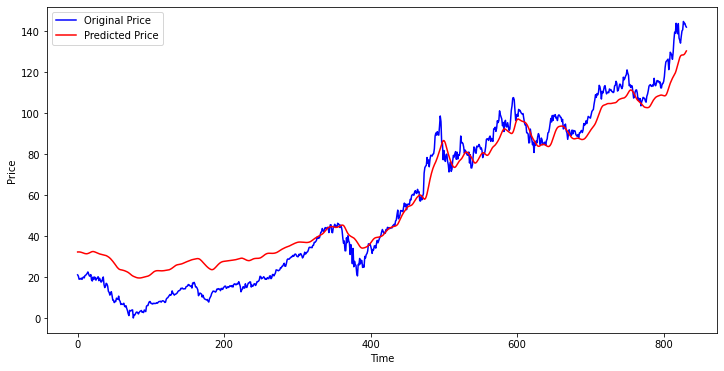

In [38]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [39]:
past_100_days_test = data_testing.tail(100)
input_30_data = scaler.fit_transform(past_100_days_test)


In [40]:
input_30_data.shape

(100, 1)

In [41]:
x_input= input_30_data.reshape(1,-1)
x_input.shape

(1, 100)

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [43]:
temp_input

[0.16314641472193347,
 0.23670792478999259,
 0.24180641232142497,
 0.2908471720675636,
 0.26826905551842817,
 0.17528528265988186,
 0.18353962394996248,
 0.21971358376663508,
 0.25661584602367604,
 0.2544305682537189,
 0.2238407544116754,
 0.2039328331779915,
 0.22966754438347659,
 0.33940264381935714,
 0.3080845275369448,
 0.32459321011710607,
 0.35226981419767434,
 0.3680505647863175,
 0.4260743387117567,
 0.3877154715739777,
 0.36246678926053955,
 0.23865018811392602,
 0.2527313193758083,
 0.21801396443987375,
 0.2401067929946641,
 0.23428000302286245,
 0.1680018878073426,
 0.0922554704181775,
 0.10415132391010218,
 0.16290377072476092,
 0.18669584815746143,
 0.18888075547856786,
 0.1512501907811581,
 0.06724943210191192,
 0.08958490465387481,
 0.05729547148506997,
 0.08521471956281079,
 0.0,
 0.04782716931142428,
 0.06943433942301835,
 0.10075245570543068,
 0.09128415353178498,
 0.08909924621067855,
 0.05753811548224297,
 0.042971696226015155,
 0.11216302120301025,
 0.1383830204028

In [44]:
# demonstrate prediction for next 30 days

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.82476044]
101
1 day input [0.23670792 0.24180641 0.29084717 0.26826906 0.17528528 0.18353962
 0.21971358 0.25661585 0.25443057 0.22384075 0.20393283 0.22966754
 0.33940264 0.30808453 0.32459321 0.35226981 0.36805056 0.42607434
 0.38771547 0.36246679 0.23865019 0.25273132 0.21801396 0.24010679
 0.23428    0.16800189 0.09225547 0.10415132 0.16290377 0.18669585
 0.18888076 0.15125019 0.06724943 0.0895849  0.05729547 0.08521472
 0.         0.04782717 0.06943434 0.10075246 0.09128415 0.08909925
 0.05753812 0.0429717  0.11216302 0.13838302 0.17989811 0.2335517
 0.24569057 0.2510317  0.23185245 0.23063849 0.24714754 0.23573698
 0.32605019 0.25880075 0.23840754 0.26414188 0.29983019 0.28696302
 0.2947317  0.27433849 0.28332113 0.21315849 0.21194453 0.26341358
 0.26365623 0.28793396 0.34838566 0.45472189 0.51978641 0.53119698
 0.54066528 0.55353245 0.42898755 0.51226038 0.63510566 0.62223849
 0.59771774 0.55110453 0.63559132 0.77785849 0.87254189 0.85991736
 0.97863547 0.88856528 0.85433358 

In [45]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [46]:
df

,High,Low,Open,Close,Volume
0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,11.973214,11.889286,11.954286,11.918929,300428800.0
...,...,...,...,...,...
2765,180.419998,177.070007,177.089996,180.330002,74919600.0
2766,181.330002,178.529999,180.160004,179.289993,79144300.0
2767,180.630005,178.139999,179.330002,179.380005,62348900.0
2768,180.570007,178.089996,179.470001,178.199997,59773000.0


In [47]:
inv_lst_output = scaler.inverse_transform(lst_output)

In [48]:
inv_lst_output

array([[173.1118838 ],
       [173.49329581],
       [173.65104189],
       [173.60543076],
       [173.40863852],
       [173.11899382],
       [172.78487224],
       [172.44151453],
       [172.11104125],
       [171.80481961],
       [171.52680725],
       [171.2767832 ],
       [171.05201247],
       [170.84866999],
       [170.66292822],
       [170.49133775],
       [170.33102853],
       [170.17968048],
       [170.0353958 ],
       [169.89661549],
       [169.76200887],
       [169.63046379],
       [169.50104729],
       [169.37296637],
       [169.24557288],
       [169.11839545],
       [168.99110016],
       [168.86345871],
       [168.73534833],
       [168.60671256]])

In [49]:
df1 = df.Close
df1

0        11.520000
1        11.770357
2        11.831786
3        11.928571
4        11.918929
           ...    
2765    180.330002
2766    179.289993
2767    179.380005
2768    178.199997
2769    177.570007
Name: Close, Length: 2770, dtype: float64

In [50]:
lst_array = np.array(inv_lst_output)
lst_array.shape

(30, 1)

In [51]:
lst_array1 = lst_array.ravel()
lst_array1

array([173.1118838 , 173.49329581, 173.65104189, 173.60543076,
       173.40863852, 173.11899382, 172.78487224, 172.44151453,
       172.11104125, 171.80481961, 171.52680725, 171.2767832 ,
       171.05201247, 170.84866999, 170.66292822, 170.49133775,
       170.33102853, 170.17968048, 170.0353958 , 169.89661549,
       169.76200887, 169.63046379, 169.50104729, 169.37296637,
       169.24557288, 169.11839545, 168.99110016, 168.86345871,
       168.73534833, 168.60671256])

In [52]:
lst_series = pd.Series(lst_array1)
lst_series

0     173.111884
1     173.493296
2     173.651042
3     173.605431
4     173.408639
5     173.118994
6     172.784872
7     172.441515
8     172.111041
9     171.804820
10    171.526807
11    171.276783
12    171.052012
13    170.848670
14    170.662928
15    170.491338
16    170.331029
17    170.179680
18    170.035396
19    169.896615
20    169.762009
21    169.630464
22    169.501047
23    169.372966
24    169.245573
25    169.118395
26    168.991100
27    168.863459
28    168.735348
29    168.606713
dtype: float64

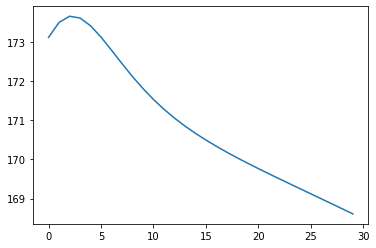

In [56]:
plt.plot(lst_series)

In [53]:
df_final = df1.append(lst_series, ignore_index = True)
df_final.tail(50)

2750    161.839996
2751    165.320007
2752    171.179993
2753    175.080002
2754    174.559998
2755    179.449997
2756    175.740005
2757    174.330002
2758    179.300003
2759    172.259995
2760    171.139999
2761    169.750000
2762    172.990005
2763    175.639999
2764    176.279999
2765    180.330002
2766    179.289993
2767    179.380005
2768    178.199997
2769    177.570007
2770    173.111884
2771    173.493296
2772    173.651042
2773    173.605431
2774    173.408639
2775    173.118994
2776    172.784872
2777    172.441515
2778    172.111041
2779    171.804820
2780    171.526807
2781    171.276783
2782    171.052012
2783    170.848670
2784    170.662928
2785    170.491338
2786    170.331029
2787    170.179680
2788    170.035396
2789    169.896615
2790    169.762009
2791    169.630464
2792    169.501047
2793    169.372966
2794    169.245573
2795    169.118395
2796    168.991100
2797    168.863459
2798    168.735348
2799    168.606713
dtype: float64

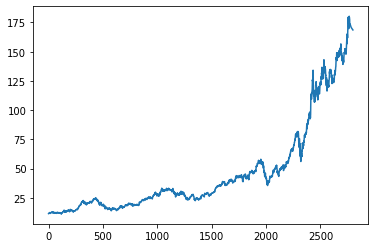

In [54]:
plt.plot(df_final)

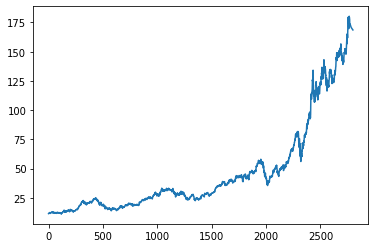

In [55]:
plt.plot(df_final)